# **Data Cleaning**

## Objectives

* Clean data

## Inputs

* The Productivity_with_AI.csv file in 'outputs/datasets/collection/'

## Outputs

* Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned 

## Additional Comments

* Since there was no missing data no data cleaning was necessary


---

# Change working directory

The notebooks are stored in a subfolder. Therefore when running the notebook in the editor, you will need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [18]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Portfolio-Project-5'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [19]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [20]:
current_dir = os.getcwd()
current_dir

'/workspaces'

# Load Data

Section 1 content

In [21]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/Productivity_with_AI.csv"))

df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/datasets/collection/Productivity_with_AI.csv'

---

# Data Check

Checking for variables with missing data and their distribution.

In [ ]:
variables_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
variables_with_missing_data

[]

In [ ]:
from ydata_profiling import ProfileReport


if variables_with_missing_data:
    profile = ProfileReport(df=df[variables_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

There are no variables with missing data


No variables with missing data were found.

---

# Correlation and PPS Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


# The 'blueprint' for this code was taken from Code Institute's second
# walkthrough project of their 'Predictive Analytics' course and adjusted for
# this project's purposes.


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman", numeric_only=True)
    df_corr_pearson = df.corr(method="pearson", numeric_only=True)

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# The line above was since FutureWarnings were cluttering the output but
# did not break anything. For further information refer to the README file
# 'Unfixed Bug'.

In [ ]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore   72.0  0.059  0.151  0.0  0.0  0.0  0.006  0.686




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



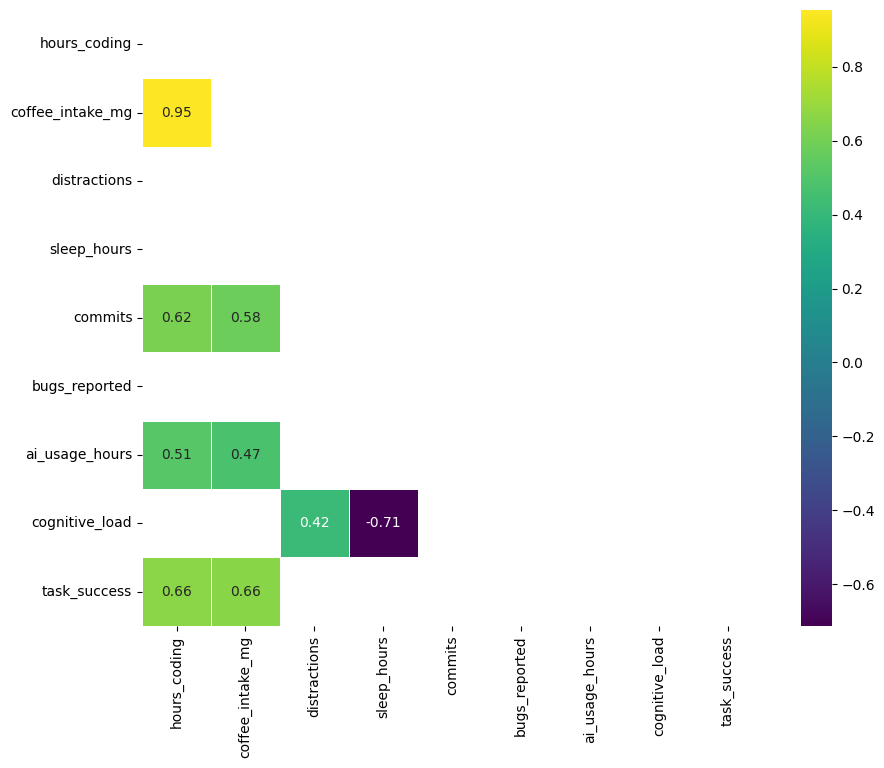



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



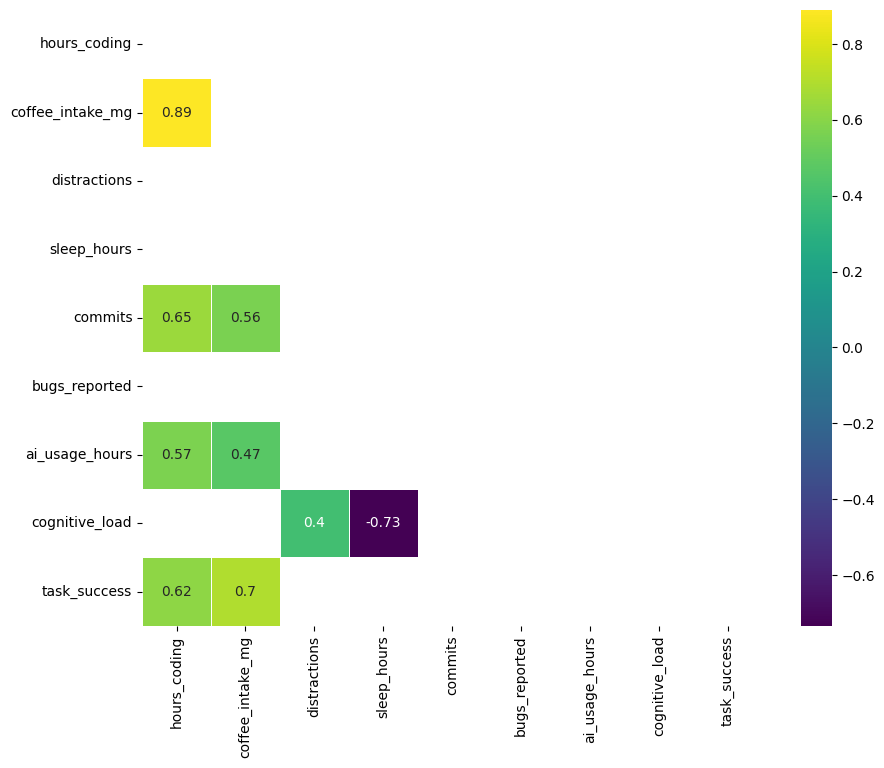



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



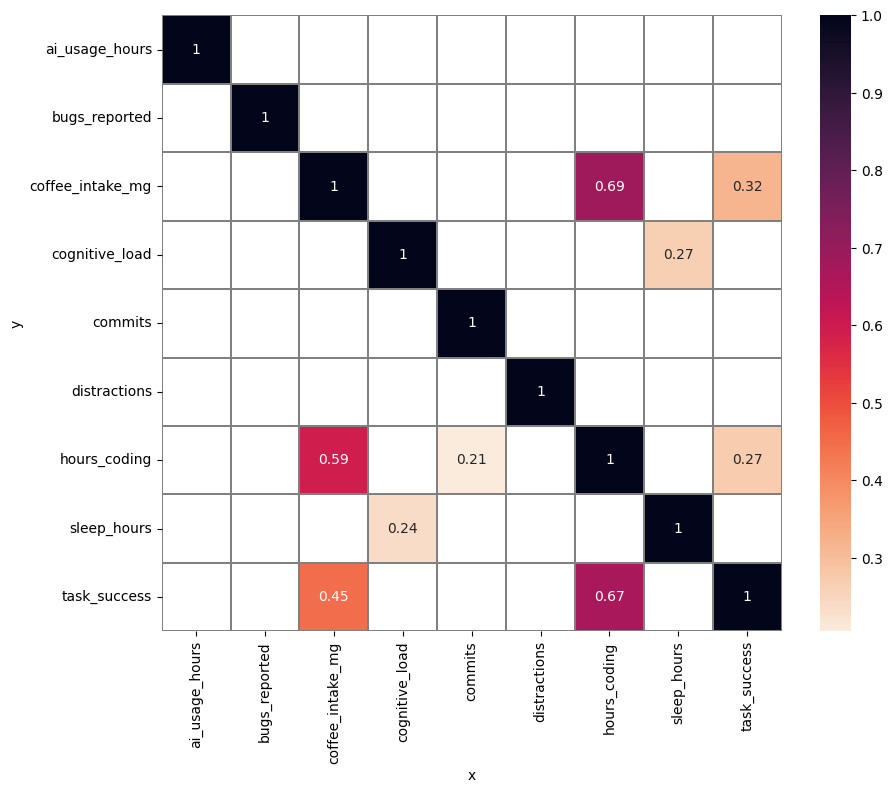

In [ ]:
# The 'blueprint' for this code was taken from Code Institute's second
# walkthrough project of their 'Predictive Analytics' course and adjusted for
# this project's purposes.


DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(10,8), font_annot=10)

# Data Cleaning

## Dealing with missing data

There is no missing data in the dataset.

## Split Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['task_success'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (400, 9) 
TestSet shape: (100, 9)


---

# Push files to Repo

* Create folder for the cleaned dataset.

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)


[Errno 17] File exists: 'outputs/datasets/cleaned'


## Train Set

In [ ]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

## Test Set

In [ ]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)